<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

---

## Problem Statement

How much does the economic background of students US states affect their ACT/SAT scores and participation rates?

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

### Outside Research

The SAT and ACT are the main standardized tests required by colleges in the United States for admission into their courses. They are considered heavily in whether a student will be admitted, together with the grade point average (GPA) achieved in high schools and the essay responses.

The SAT has two sections: Evidence-Based Reading and Writing, and Math. The subject test has been [removed](https://blog.collegeboard.org/January-2021-sat-subject-test-and-essay-faq) as of Jan 2021. The [ACT](https://www.latutors123.com/tutoring-resources/act/format-dates/) has 4 multiple-choice sections with an optional written test.

[More students](https://www.collegeraptor.com/getting-in/articles/act-sat/act-vs-sat-comparing-two-college-entrance-exams/) take the ACT over the SAT, and there is a "different standardized testing preference on a state by state basis", shown in the [infographic](https://www.collegeraptor.com/getting-in/articles/act-sat/preference-act-sat-state-infographic/) below. [In fact](https://www.niche.com/blog/students-who-take-the-sat-vs-the-act-in-each-state/), more coastal states choose the SAT and middle states choose the ACT.

There have been claims that standardized testing propagates economic inequality, for reasons such as [better access to preparation](https://www.cnbc.com/2019/10/03/rich-students-get-better-sat-scores-heres-why.html), including a 2013 [paper](https://www.researchgate.net/publication/280232788_Race_Poverty_and_SAT_Scores_Modeling_the_Influences_of_Family_Income_on_Black_and_White_High_School_Students'_SAT_Performance) that claims "the effects of family income on SAT scores... are substantial, non-linear, and nearly twice as large for Black students". There was also an [article](https://www.nea.org/advocating-for-change/new-from-nea/racist-beginnings-standardized-testing) by the National Education Association that links the racist beginnings of standardized testing with eugenics. There was even a [lawsuit](https://www.forbes.com/sites/kimelsesser/2019/12/11/lawsuit-claims-sat-and-act-are-biased-heres-what-research-says/) in 2019 claiming that the SAT and ACT are racially and economically biased, but some claim other factors like lack of test preparation and bribery.

A College Board (administrator of the SAT) [research report](https://files.eric.ed.gov/fulltext/ED562860.pdf) claims that "the vast majority of the SAT–grade relationship is independent of SES \[socio-economic status\]", while another 2013 College Board [report](https://secure-media.collegeboard.org/digitalServices/pdf/research/2013/TotalGroup-2013.pdf) shows a proportional relationship between family income and scores attained. The ACT, on the other hand, published a [2016 report](https://www.act.org/content/dam/act/unsecured/documents/R1604-ACT-Composite-Score-by-Family-Income.pdf) shows a flat relationship between family income and the scores attained.

In the face of seemingly conflicting information, it would be prudent to perform an analysis on test results for both standardized tests, comparing the scores attained and participation rates with the economic status across states.

<div>
<img src="../images/sat_act_infographic.jpg" width="450"/>
</div>

### Choosing Data

Of the datasets provided, we chose 2 to work with:

* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State

The first is a list of (average) ACT composite scores and participation rate by state, and the second is a list of (average) total SAT scores and participation rate by state.

In addition, we also examine a [list of US states by GDP](https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP_per_capita), which provides the GDP per capita for each US state in 2019, exactly the time period we will analyse.

### Coding Challenges

1. Manually calculate mean:

In [1]:
def new_mean(n):
    return sum(n) / len(n)

2. Manually calculate standard deviation:

In [2]:
def new_std(n):
    var = sum((i - new_mean(n)) ** 2 for i in n)
    return (1 / len(n) * var) ** 0.5

3. Data cleaning function:


In [3]:
def percent_to_dec(n):
    x = float(n.replace("%", ""))
    return x / 100

--- 
# Part 2


---

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import normaltest, skew

## Data Import and Cleaning
___

### Data Import & Cleaning

In [5]:
act2019 = pd.read_csv("../data/act_2019.csv")
sat2019 = pd.read_csv("../data/sat_2019.csv")

### Cleaning `act2019` and `sat2019` datasets

In [6]:
act2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [7]:
act2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


It is fortunate that there are no null entries. The only cleaning we need is to convert the participation column to a float and the column headers into lower case. Since the 'National' row isn't in the `sat2019` dataset, we will also remove it.

In [8]:
act2019_clean = act2019.rename(str.lower, axis=1)
act2019_clean = act2019_clean[act2019_clean["state"] != "National"]
act2019_clean["participation"] = act2019_clean["participation"].map(percent_to_dec)
act2019_clean.head()

,state,participation,composite
0,Alabama,1.00,18.9
1,Alaska,0.38,20.1
2,Arizona,0.73,19.0
3,Arkansas,1.00,19.3
4,California,0.23,22.6


We can perform the same cleaning steps for the `sat2019` dataset.

In [9]:
sat2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [10]:
sat2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


Again, there are no null entries. However, there are two additional states, Puerto Rico and Virgin Islands (with participation rate `-`), that were added in this dataset. But since they are not in the `act2019` dataset, we will drop them from our data.

In [11]:
sat2019_clean = sat2019.rename(str.lower, axis=1)
sat2019_clean = sat2019_clean[sat2019_clean["participation rate"] != "—"]

In [12]:
sat2019_clean["participation rate"] = sat2019_clean["participation rate"].map(
    percent_to_dec
)
sat2019_clean.head()

,state,participation rate,ebrw,math,total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


In [13]:
sat2019_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               51 non-null     object 
 1   participation rate  51 non-null     float64
 2   ebrw                51 non-null     int64  
 3   math                51 non-null     int64  
 4   total               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.4+ KB


By observing the information from both datasets, they are primed and ready to be compared. Let's save them into csv files.

In [14]:
act2019_clean.to_csv("../data/act2019_clean.csv")
sat2019_clean.to_csv("../data/sat2019_clean.csv")

### Cleaning additional dataset

To obtain the economic status of US states, we can examine a table from the [list of US states by GDP](https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP_per_capita).

list of undone stuff:
- save to new `.csv`
- decide which stat is more important

In [15]:
states_gdp = pd.read_csv("../data/states_gdp.csv")
states_gdp.head()

,Nationalrank,Globalrank,State or territory,2019
0,1,1,District of Columbia,"200,277"
1,2,2,New York,"90,043"
2,3,2,Massachusetts,"86,942"
3,4,3,Connecticut,"81,055"
4,5,3,California,"80,563"


We need to convert the variables to lower case, and drop unnecessary columns. The entries are also in object type, and need to be converted to floats. Furthermore, there are 57 rows where there should be 51 - these are the additional territories and the national average that we are not considering (with `globalrank` or `nationalrank` as '-'). We will remove them too.

In [16]:
# delete unnecessary columns/rows

states_gdp_clean = states_gdp.rename(str.lower, axis=1)
states_gdp_clean.rename({"state or territory": "state"}, axis=1, inplace=True)
states_gdp_clean = states_gdp_clean[
    (states_gdp_clean["globalrank"] != "—") & (states_gdp_clean["nationalrank"] != "—")
]
states_gdp_clean = states_gdp_clean[["state", "2019"]]

In [17]:
# change dtype

states_gdp_clean["2019"] = (
    states_gdp_clean["2019"].str.split(",").str.join("").astype(float)
)
states_gdp_clean.head()

,state,2019
0,District of Columbia,200277.0
1,New York,90043.0
2,Massachusetts,86942.0
3,Connecticut,81055.0
4,California,80563.0


In [18]:
states_gdp_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 51
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   51 non-null     object 
 1   2019    51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


As we can see from the information of this new variable, the data is in order and is ready for use. We will save it in a new csv file.

In [19]:
states_gdp_clean.to_csv("../data/states_gdp_clean.csv")

### Merging the useful datasets

Lastly, we should merge the relevant data into one dataframe for easier reference. We will combine the ACT/SAT scores and participation rates, and GDP into one table.

In [20]:
scores_gdp = pd.merge(
    act2019_clean[["state", "composite", "participation"]],
    sat2019_clean[["state", "total", "participation rate"]],
    on="state",
)
scores_gdp = pd.merge(scores_gdp, states_gdp_clean[["state", "2019"]], on="state")
scores_gdp.rename(
    {
        "composite": "act",
        "participation": "act_part_rate",
        "total": "sat",
        "participation rate": "sat_part_rate",
        "2019": "gdp_per_capita",
    },
    axis=1,
    inplace=True,
)
scores_gdp.head()

,state,act,act_part_rate,sat,sat_part_rate,gdp_per_capita
0,Alabama,18.9,1.00,1143,0.07,47735.0
1,Alaska,20.1,0.38,1097,0.41,76220.0
2,Arizona,19.0,0.73,1134,0.31,51179.0
3,Arkansas,19.3,1.00,1141,0.06,44808.0
4,California,22.6,0.23,1065,0.63,80563.0


For easier plotting later, we will add an additional column beside `state` that has the abbreviations of the state names.

In [21]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "District of Columbia": "DC",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
}

scores_gdp["state_abbr"] = scores_gdp["state"].map(us_state_to_abbrev)
cols = list(scores_gdp.columns.values)
scores_gdp = scores_gdp[
    [cols[0]] + [cols[-1]] + cols[1:6]
]  # reordering state_abbr column to be at the front
scores_gdp.head()

,state,state_abbr,act,act_part_rate,sat,sat_part_rate,gdp_per_capita
0,Alabama,AL,18.9,1.00,1143,0.07,47735.0
1,Alaska,AK,20.1,0.38,1097,0.41,76220.0
2,Arizona,AZ,19.0,0.73,1134,0.31,51179.0
3,Arkansas,AR,19.3,1.00,1141,0.06,44808.0
4,California,CA,22.6,0.23,1065,0.63,80563.0


We can do a final check of our dataframe, and everything is in order - the types, the columns, and no null values. The data is ready to be processed.

In [22]:
scores_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           51 non-null     object 
 1   state_abbr      51 non-null     object 
 2   act             51 non-null     float64
 3   act_part_rate   51 non-null     float64
 4   sat             51 non-null     int64  
 5   sat_part_rate   51 non-null     float64
 6   gdp_per_capita  51 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.2+ KB


### Data Dictionary

| Feature        | Type   | Dataset   | Description                                                                       |
| ---            | ---    | ---       | ---                                                                               |
| state          | object | act_2019  | The names of the 52 states in the US (not including territories and dependencies) |
| state_abbr     | object | -         | The abbreviated names of the states for easier plotting                           |
| act            | float  | act_2019  | average ACT composite score by state                                              |
| act_part_rate  | float  | act_2019  | ACT participation rate by state                                                   |
| sat            | int    | sat_2019  | average SAT composite score by state                                              |
| sat_part_rate  | float  | sat_2019  | SAT participation rate by state                                                   |
| gdp_per_capita | float  | state_gdp | The GDP per capita of each US state in 2019, taken from wikipedia                 |

## Exploratory Data Analysis
___

It would be prudent to first take a look at the high-level statistics. From this, a few important information stand out:
- the mean ACT score is 21, SAT is 1113, and GDP is about $64,000.
- the standard deviation of the GDP is relatively huge across states, while not for the SAT and ACT scores

In [23]:
scores_gdp.describe().round(3)

,act,act_part_rate,sat,sat_part_rate,gdp_per_capita
count,51.000,51.000,51.000,51.000,51.000
mean,21.465,0.587,1113.078,0.491,64394.412
std,2.195,0.345,97.198,0.387,22616.341
min,17.900,0.060,943.000,0.020,40464.000
25%,19.800,0.245,1038.000,0.055,52077.000
50%,21.100,0.540,1097.000,0.540,60464.000
75%,23.700,1.000,1210.000,0.820,69210.500
max,25.500,1.000,1284.000,1.000,200277.000


From the high-level statistics, a few salient points can be observed:
- the participation rates for both tests have a large spread, as evidenced by the standard deviations being almost the same as the mean
- the ACT participation rate is smaller than the SAT one
- the test scores have relatively small standard deviations

Another point to note is that the mean of the SAT participation rate is almost 10% less than the ACT, a relationship that will be explored [later](#Participation-rates-for-both-tests).

In [24]:
sd = {col: new_std(scores_gdp[col]) for col in scores_gdp.columns[2:]}
sd

{'act': 2.172901153595978,
 'act_part_rate': 0.3417582373703047,
 'sat': 96.24027185617864,
 'sat_part_rate': 0.3836584048685726,
 'gdp_per_capita': 22393.51452959791}

We can take a look at the scores of the richest states. With the exception of Massachusetts, the rest of the top 5 richest states have average SAT scores below the mean. On the other hand, their ACT scores ranked near or above the 75th percentile. This seems to be correlated with the participation rates of each test too.

In [25]:
scores_gdp.nlargest(5, "gdp_per_capita")

,state,state_abbr,act,act_part_rate,sat,sat_part_rate,gdp_per_capita
8,District of Columbia,DC,23.5,0.32,975,0.94,200277.0
32,New York,NY,24.5,0.22,1064,0.79,90043.0
21,Massachusetts,MA,25.5,0.21,1120,0.81,86942.0
6,Connecticut,CT,25.5,0.22,1046,1.00,81055.0
4,California,CA,22.6,0.23,1065,0.63,80563.0


At the other end of the spectrum, we can also examine the scores of the poorest states. At first glance, with the exception of Idaho, the scores for these states are below the mean for the ACT, the spread of the SAT scores are more varied. In both the top and bottom earners, the participation rates for the ACT seem to be inversely proportionate with that of SAT. 

In [26]:
scores_gdp.nsmallest(5, "gdp_per_capita")

,state,state_abbr,act,act_part_rate,sat,sat_part_rate,gdp_per_capita
24,Mississippi,MS,18.4,1.00,1237,0.03,40464.0
48,West Virginia,WV,20.8,0.49,943,0.99,43806.0
3,Arkansas,AR,19.3,1.00,1141,0.06,44808.0
12,Idaho,ID,22.5,0.31,993,1.00,46043.0
0,Alabama,AL,18.9,1.00,1143,0.07,47735.0


### Scores and participation rates vs GDP per capita

We would naturally assume that the higher the mean scores, the higher the GDP and vice versa. 

There were 14 states that did above average on the ACT while having GDP per capita above the average, but their participation rates were all below the mean. This might possibly indicate that only those in better schools took the ACT. It is also worth noting that even though they had low participation rates for the ACT, they all had SAT participation rates above the mean. This might indicate that some brighter students would have taken both the ACT and SAT to boost their portfolios. This is especially prominent in states like CT and DE where the SAT participation rates are 100%, but a minority still chose to take the ACT too.

In [27]:
# high GDP high ACT score

scores_gdp.loc[
    (scores_gdp["act"] > scores_gdp["act"].mean())
    & (scores_gdp["gdp_per_capita"] > scores_gdp["gdp_per_capita"].mean())
].sort_values(["gdp_per_capita"], ascending=False).head()

,state,state_abbr,act,act_part_rate,sat,sat_part_rate,gdp_per_capita
8,District of Columbia,DC,23.5,0.32,975,0.94,200277.0
32,New York,NY,24.5,0.22,1064,0.79,90043.0
21,Massachusetts,MA,25.5,0.21,1120,0.81,86942.0
6,Connecticut,CT,25.5,0.22,1046,1.00,81055.0
4,California,CA,22.6,0.23,1065,0.63,80563.0


The converse also seems to be true, where states that had GDP below the mean and did badly for the ACT, had high participation rates. This might indicate the presence of weaker students being made to take the test and thus pulling down the average. The ACT and SAT participation rates also generally have an inverse relationship, where high ACT participation rates generally mean low SAT ones (with a few exceptions). However, in both analyses, the relationship between the GDP and ACT scores are not very clear, with the fluctuations relatively significant. 

These relationships will be made clearer upon a visual analysis [later](#Scatterplot).

In [28]:
# low ACT score low GDP

scores_gdp.loc[
    (scores_gdp["act"] < scores_gdp["act"].mean())
    & (scores_gdp["gdp_per_capita"] < scores_gdp["gdp_per_capita"].mean())
].sort_values(["gdp_per_capita"], ascending=False).head()

,state,state_abbr,act,act_part_rate,sat,sat_part_rate,gdp_per_capita
37,Oregon,OR,21.1,0.42,1112,0.51,60558.0
35,Ohio,OH,20.0,1.00,1097,0.19,60464.0
49,Wisconsin,WI,20.3,1.00,1283,0.03,60425.0
16,Kansas,KS,21.2,0.72,1241,0.04,60310.0
10,Georgia,GA,21.4,0.49,1058,0.71,58896.0


We perform the same analyses on the SAT scores against the GDP, and similar patterns emerge. Again, an inverse relationship can be seen between the ACT and SAT participation rates, and the SAT scores and participation rates. There is again no clear relationship between the SAT scores and the GDP.

In [29]:
# high SAT high GDP

scores_gdp.loc[
    (scores_gdp["sat"] > scores_gdp["sat"].mean())
    & (scores_gdp["gdp_per_capita"] > scores_gdp["gdp_per_capita"].mean())
].sort_values(["gdp_per_capita"], ascending=False)

,state,state_abbr,act,act_part_rate,sat,sat_part_rate,gdp_per_capita
21,Massachusetts,MA,25.5,0.21,1120,0.81,86942.0
34,North Dakota,ND,19.9,0.96,1263,0.02,75321.0
50,Wyoming,WY,19.8,1.00,1238,0.03,68757.0
23,Minnesota,MN,21.4,0.95,1284,0.04,68427.0
27,Nebraska,NE,20.0,1.00,1260,0.03,66737.0
46,Virginia,VA,24.0,0.21,1119,0.68,65824.0


In [30]:
# low SAT low GDP

scores_gdp.loc[
    (scores_gdp["sat"] < scores_gdp["sat"].mean())
    & (scores_gdp["gdp_per_capita"] < scores_gdp["gdp_per_capita"].mean())
].sort_values(["gdp_per_capita"], ascending=False).head()

,state,state_abbr,act,act_part_rate,sat,sat_part_rate,gdp_per_capita
39,Rhode Island,RI,24.7,0.12,995,1.00,60830.0
37,Oregon,OR,21.1,0.42,1112,0.51,60558.0
35,Ohio,OH,20.0,1.00,1097,0.19,60464.0
10,Georgia,GA,21.4,0.49,1058,0.71,58896.0
33,North Carolina,NC,19.0,1.00,1100,0.51,56862.0


## Data Visualisation

___

### Heatmap

In [31]:
scores_gdp.corr()

,act,act_part_rate,sat,sat_part_rate,gdp_per_capita
act,1.000000,-0.866819,-0.424782,0.724619,0.383936
act_part_rate,-0.866819,1.000000,0.666966,-0.865435,-0.324806
sat,-0.424782,0.666966,1.000000,-0.861786,-0.206848
sat_part_rate,0.724619,-0.865435,-0.861786,1.000000,0.293163
gdp_per_capita,0.383936,-0.324806,-0.206848,0.293163,1.000000


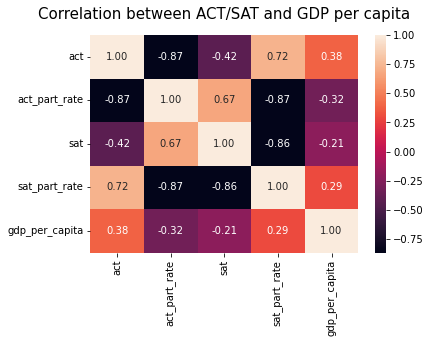

In [32]:
heatmap = sns.heatmap(scores_gdp.corr(), annot=True, fmt=".2f")
heatmap.set_title(
    "Correlation between ACT/SAT and GDP per capita", fontdict={"fontsize": 15}, pad=16
);

What is interesting from the heatmap is that the GDP has a low correlation (0.38 with ACT and -0.21 with SAT) with the other variables. 

Another observation is that both tests have a strong inverse relationship between the grades and the participation rates (-0.87 for ACT and -0.86 for SAT), giving credence to the hypotheses discussed in the [statistical analysis](#Scores-and-participation-rates-vs-GDP-per-capita) above. 

The ACT and SAT participation rates also have a strong inverse correlation (-0.87), suggesting that students generally choose one or the other.

### Histogram

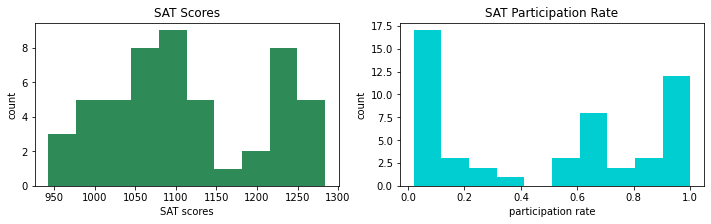

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].hist(scores_gdp["sat"], color="seagreen")
axes[0].set_title("SAT Scores")
axes[0].set_xlabel("SAT scores")
axes[0].set_ylabel("count")

axes[1].hist(scores_gdp["sat_part_rate"], color="darkturquoise")
axes[1].set_title("SAT Participation Rate")
axes[1].set_xlabel("participation rate")
axes[1].set_ylabel("count");

The SAT score seems like it might follow a normal curve upon visual inspection, whereas the participation rate does not. This can be further verified with a 2-tailed chi-squared test.

In [34]:
print(normaltest(scores_gdp["sat"]))
print(normaltest(scores_gdp["sat_part_rate"]))

NormaltestResult(statistic=9.093181082099653, pvalue=0.010603294322038527)
NormaltestResult(statistic=88.9759718932383, pvalue=4.77653750777514e-20)


A p-value of more than 0.05 shows a close fit (to a 5% confidence level), and both the scores and the participation rates fail this criterion. The normal distribution of the scores should be expected for standardized testing, whereas participation rates might be influenced by other factors like states making ACT compulsory while not the SAT. The failure of the scores to fit a normal distribution can be down to the lack of data points and that these are averages across a whole state, which may not be representative.

The z-score ('statistic') shows the skewness of the data, and a higher value means the the data is skewed more from a normal distribution. In this case, the participation rate is definitely skewed heavily.

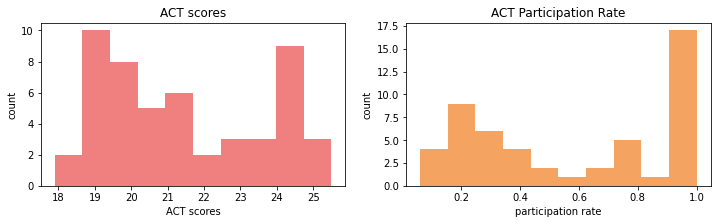

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].hist(scores_gdp["act"], color="lightcoral")
axes[0].set_title("ACT scores")
axes[0].set_xlabel("ACT scores")
axes[0].set_ylabel("count")

axes[1].hist(scores_gdp["act_part_rate"], color="sandybrown")
axes[1].set_title("ACT Participation Rate")
axes[1].set_xlabel("participation rate")
axes[1].set_ylabel("count");

In [36]:
print(normaltest(scores_gdp["act"]))
print(normaltest(scores_gdp["act_part_rate"]))

NormaltestResult(statistic=14.753131457417009, pvalue=0.0006257461822757828)
NormaltestResult(statistic=113.58272495182037, pvalue=2.166829087620389e-25)


Once again, we see that the test scores and participation rates do not follow a normal distribution, with the participation rate heavily skewed and has a low p-value. The explanation would be the same as that of SAT.

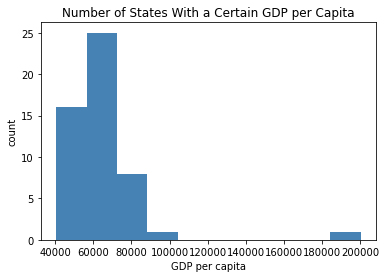

In [37]:
hist = plt.hist(scores_gdp["gdp_per_capita"], color="steelblue")
plt.title("Number of States With a Certain GDP per Capita")
plt.xlabel("GDP per capita")
plt.ylabel("count");

A simple visual inspection would inform us that this is definitely not a normal distribution, but we shall perform the same normal test for sake of completeness.

In [38]:
normaltest(scores_gdp["gdp_per_capita"])

NormaltestResult(statistic=82.52503130874888, pvalue=1.2020350789651113e-18)

As expected, because of the large outlier (DC), the GDP does not follow a normal distribution, being heavily skewed. This could be attributed to the lack of data points, and the fact that there is systemic inequality present across the states.

### Boxplot

The boxplot of the ACT scores show the median being skewed towards the bottom. The large interquartile range of the participation rate indicates that there is a large deviation within the dataset.

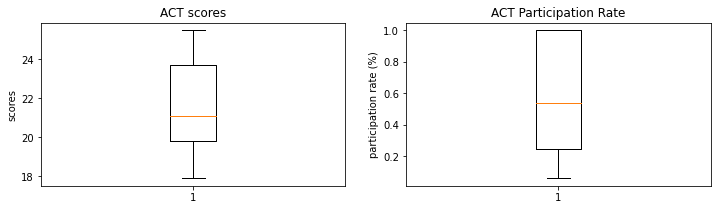

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].boxplot(x=scores_gdp["act"])
axes[0].set_title("ACT scores")
axes[0].set_ylabel("scores")

axes[1].boxplot(scores_gdp["act_part_rate"])
axes[1].set_title("ACT Participation Rate")
axes[1].set_ylabel("participation rate (%)");

We see the same patterns with the SAT data, of the skewness of the scores and the large range in the participation rates. This might again be influenced by the variation in educational policies across states.

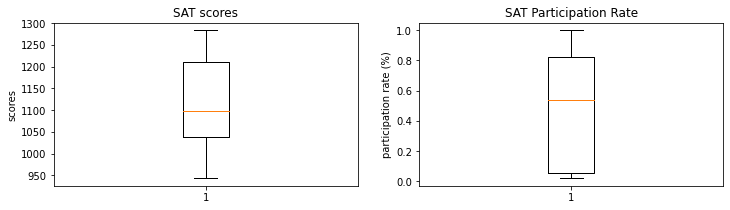

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].boxplot(x=scores_gdp["sat"])
axes[0].set_title("SAT scores")
axes[0].set_ylabel("scores")

axes[1].boxplot(scores_gdp["sat_part_rate"])
axes[1].set_title("SAT Participation Rate")
axes[1].set_ylabel("participation rate (%)");

The single outlier that is DC makes this boxplot slightly harder to read, but it is still obvious that there is a skew towards the higher GDP, again bringing up the problem of inequality across states. The boxplot below (without DC) shows a large skew towards the poorer end of the spectrum.

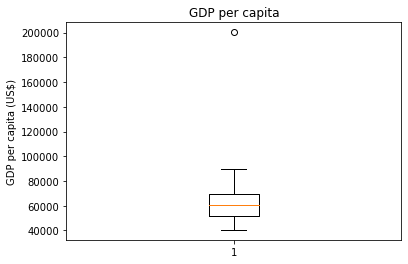

In [41]:
plt.boxplot(x=scores_gdp["gdp_per_capita"])
plt.title("GDP per capita")
plt.ylabel("GDP per capita (US$)");

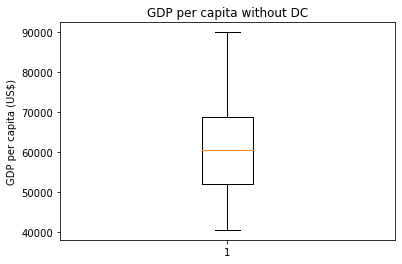

In [42]:
plt.boxplot(x=scores_gdp.loc[scores_gdp["state_abbr"] != "DC"]["gdp_per_capita"])
plt.title("GDP per capita without DC")
plt.ylabel("GDP per capita (US$)");

### Scatterplot

#### GDP against scores

Both the correlation matrix and the scatterplot show a relatively weak correlation between the SAT/ACT scores across the economic spectrum with the obvious outlier being DC. There is no clear relationship between the GDP and the scores for both tests, which is consistent with what we found from our earlier analyses.

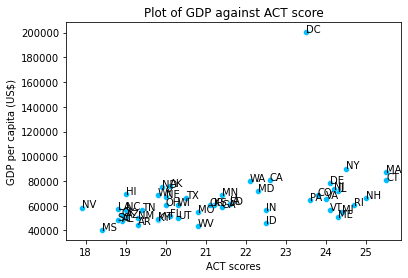

In [43]:
sns.scatterplot(
    x=scores_gdp["act"],
    y=scores_gdp["gdp_per_capita"],
    data=scores_gdp["state"],
    color="deepskyblue",
)
for idx, st in enumerate(scores_gdp["state_abbr"]):
    plt.annotate(st, (scores_gdp["act"][idx], scores_gdp["gdp_per_capita"][idx]))
plt.xlabel("ACT scores")
plt.ylabel("GDP per capita (US$)")
plt.title("Plot of GDP against ACT score")
plt.savefig("../images/act_gdp_sp.png", bbox_inches="tight");

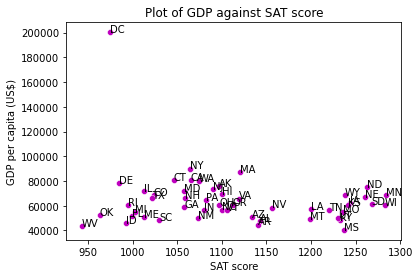

In [44]:
sns.scatterplot(
    x=scores_gdp["sat"],
    y=scores_gdp["gdp_per_capita"],
    data=scores_gdp["state"],
    color="m",
)
for idx, st in enumerate(scores_gdp["state_abbr"]):
    plt.annotate(st, (scores_gdp["sat"][idx], scores_gdp["gdp_per_capita"][idx]))
plt.xlabel("SAT score")
plt.ylabel("GDP per capita (US$)")
plt.title("Plot of GDP against SAT score")
plt.savefig("../images/sat_gdp_sp.png", bbox_inches="tight");

#### GDP against participation rates

There is no clear relation between the GDP and the participation rates of both tests, which again corroborates our earlier analysis. Even without considering the obvious outlier (DC), there is no obvious trend in the relationship between these two variables. We can see the SAT participation having a larger spread than the ACT, which is what we saw in an earlier [section](#Exploratory-Data-Analysis).

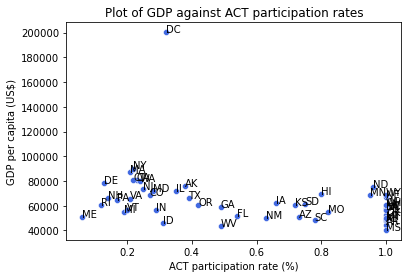

In [45]:
sns.scatterplot(
    x=scores_gdp["act_part_rate"],
    y=scores_gdp["gdp_per_capita"],
    data=scores_gdp["state"],
    color="royalblue",
)
for idx, st in enumerate(scores_gdp["state_abbr"]):
    plt.annotate(
        st, (scores_gdp["act_part_rate"][idx], scores_gdp["gdp_per_capita"][idx])
    )
plt.xlabel("ACT participation rate (%)")
plt.ylabel("GDP per capita (US$)")
plt.title("Plot of GDP against ACT participation rates")
plt.savefig("../images/actpart_gdp_sp.png", bbox_inches="tight");

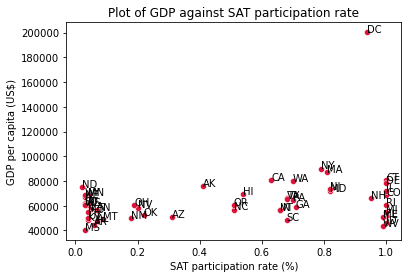

In [46]:
sns.scatterplot(
    x=scores_gdp["sat_part_rate"],
    y=scores_gdp["gdp_per_capita"],
    data=scores_gdp["state"],
    color="crimson",
)
for idx, st in enumerate(scores_gdp["state_abbr"]):
    plt.annotate(
        st, (scores_gdp["sat_part_rate"][idx], scores_gdp["gdp_per_capita"][idx])
    )
plt.xlabel("SAT participation rate (%)")
plt.ylabel("GDP per capita (US$)")
plt.title("Plot of GDP against SAT participation rate")
plt.savefig("../images/satpart_gdp_sp.png", bbox_inches="tight");

There is a cluster of states at the bottom left of the SAT graph, indicating a relatively large proportion (33%) of states having less than 10% participation in the SAT. This is high compared to the 2% of states with less than 10% participation in the ACT.

In [47]:
len(scores_gdp.loc[scores_gdp["sat_part_rate"] < 0.1]) / 52

0.3269230769230769

In [48]:
len(scores_gdp.loc[scores_gdp["act_part_rate"] < 0.1]) / 52

0.019230769230769232

There are also more states having a 90% participation rate in the ACT (33%) as compared to the SAT (23%).

In [49]:
len(scores_gdp.loc[scores_gdp["sat_part_rate"] > 0.9]) / 52

0.23076923076923078

In [50]:
len(scores_gdp.loc[scores_gdp["act_part_rate"] > 0.9]) / 52

0.3269230769230769

This shows that the ACT is much more popular than the SAT. This relationship will be explored in the section below.

#### Participation rates for both tests

An important scatterplot we can plot is that comparing the participation rates between the two tests. There is a noticeable inverse trend between them, which lends support to our previous hypothesis. The cluster at the bottom right indicates that there is a higher participation rate for the ACT than the SAT.

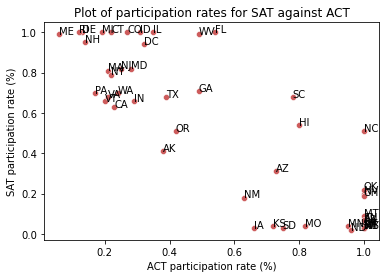

In [51]:
sns.scatterplot(
    x=scores_gdp["act_part_rate"],
    y=scores_gdp["sat_part_rate"],
    data=scores_gdp["state"],
    color="indianred",
)
for idx, st in enumerate(scores_gdp["state_abbr"]):
    plt.annotate(
        st, (scores_gdp["act_part_rate"][idx], scores_gdp["sat_part_rate"][idx])
    )
plt.xlabel("ACT participation rate (%)")
plt.ylabel("SAT participation rate (%)")
plt.title("Plot of participation rates for SAT against ACT")
plt.savefig("../images/satpart_actpart_sp.png", bbox_inches="tight");

#### Scores against participation rates

The plots below show relatively clear decreasing trends between the score achieved and the participation rates for both tests. This is consistent with the correlation value in the heatmap.

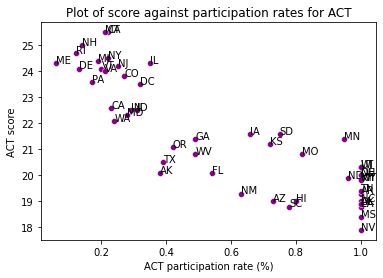

In [52]:
sns.scatterplot(
    x=scores_gdp["act_part_rate"],
    y=scores_gdp["act"],
    data=scores_gdp["state"],
    color="darkmagenta",
)
for idx, st in enumerate(scores_gdp["state_abbr"]):
    plt.annotate(st, (scores_gdp["act_part_rate"][idx], scores_gdp["act"][idx]))
plt.xlabel("ACT participation rate (%)")
plt.ylabel("ACT score")
plt.title("Plot of score against participation rates for ACT")
plt.savefig("../images/actpart_act_sp.png", bbox_inches="tight");

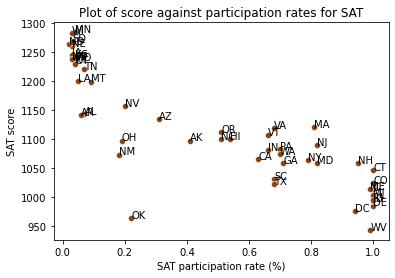

In [53]:
sns.scatterplot(
    x=scores_gdp["sat_part_rate"],
    y=scores_gdp["sat"],
    data=scores_gdp["state"],
    color="saddlebrown",
)
for idx, st in enumerate(scores_gdp["state_abbr"]):
    plt.annotate(st, (scores_gdp["sat_part_rate"][idx], scores_gdp["sat"][idx]))
plt.xlabel("SAT participation rate (%)")
plt.ylabel("SAT score")
plt.title("Plot of score against participation rates for SAT")
plt.savefig("../images/satpart_sat_sp.png", bbox_inches="tight");

## Conclusions and Recommendations

### Conclusion

Throughout our analysis, a few points have been salient:
- there is low correlation between the GDP per capita of the states and their scores in the standardized tests (p=0.38 for ACT and p=-0.21 for SAT)
- an inverse relationship is prominent between the scores and the participation rates, i.e. the less students taking the tests, the higher the average grades (p=-0.87 for ACT, p=-0.86 for SAT)
- there is also an inverse relationship between the participation rates for both tests, i.e. students who take the SAT generally do not take the ACT and vice versa (p=-0.87)
- there is a significant number of states with low SAT participation, compared to the ACT

This suggests, against most of the sources cited in the [background](#Background), that standardised tests are not related to economic data. There is indeed no clear correlation, and the problem statement can be answered in the **negative**. However, given the limitations ([discussed later](#Limitations-and-future-work)) of the data provided and time constraints, there is still much work to be done to provide a thorough analysis. 

The inverse relationship between the scores and participation rates indicates that when the participation rates are below 100%, only the smarter students choose to take the tests. This could be linked to the desire for higher education rather than more technical fields of study.

The inverse relationship between both tests corroborates the [prior research](#Outside-Research), but more work can be done in finding out why, and how this relates to economic distribution.

It is also telling that the distributions of SAT and ACT scores are inversely proportionate, verifying the infographic presented at the start, and also verifying that more students take the ACT over the SAT in the US. 

### Limitations and recommendations

Firstly, GDP per capita is not the only economic metric that should be considered, others include household income, personal income, family income etc. 

Next, other factors that affect academic performance should also be considered, e.g. access to resources, teaching quality scores. There are also related factors that affect the varying participation rates, e.g. school funding.

More data could also be gathered to see the trends across various years, which might allow clearer patterns to emerge.

One conspicuous area not considered is why the proportion of students taking the tests vary considerably between states. Other than the cursory information that the the SAT is most popular in the coastal states while the ACT is popular in the middle states, more information could be gathered to explore why this is so, but this is beyond the scope of this analysis. 